# The Simpsons - 29 Years of IMDB ratings & US Viewership

The Simpsons are about to begin their 30th season which began back in 1989. In twenty-nine seasons, 639 episodes have aired. This is an analysis of the ratings and US viewership. For the ratings I dowloaded a number of files from IMDB, and cleaned the data accordingly. For US Viewership I pulled the data from Wikipedia. 

The analysis and process are below

# Step 1 
## Gather the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# total of 5 files downloaded - different info in each.
# tsv file containing titles of movies, tv, shows, etc
title_df = pd.read_table('title_akas.tsv', low_memory=False)

In [3]:
title_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [4]:
# quick check of the data
title_df.isnull().sum()

titleId             0
ordering            0
title               0
region             55
language            0
types               0
attributes          0
isOriginalTitle     0
dtype: int64

In [5]:
# nulls in the region not important
# find "The Simpsons" parent title ID
# select region 'US' and title 'The Simpsons'

mask1 = title_df['region'] == 'US'
mask2 = title_df['title'] == 'The Simpsons'

simpson_titleid = title_df[mask1 & mask2]
simpson_titleid

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
584914,tt0096697,12,The Simpsons,US,\N,\N,\N,0


In [6]:
# now that we have the titleid, we need the idividual episodes identifiers
episode_df = pd.read_table('title_episode.tsv', low_memory=False)

In [7]:
episode_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0033908,tt8335206,\N,\N
1,tt0033952,tt8335206,\N,\N
2,tt0034547,tt8335206,\N,\N
3,tt0034657,tt8335206,\N,\N
4,tt0034731,tt8335206,\N,\N


In [8]:
# quick check of the data
episode_df.isnull().sum()

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
dtype: int64

In [9]:
# selecting the individual epiosdes
simpsons_episodes_df = episode_df[episode_df['parentTconst']== 'tt0096697']

In [10]:
simpsons_episodes_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
3026,tt0177842,tt0096697,7,6
6618,tt0348034,tt0096697,1,1
208653,tt0701040,tt0096697,5,10
208654,tt0701041,tt0096697,6,22
208655,tt0701042,tt0096697,14,16


In [11]:
simpsons_episodes_df.tail()

,tconst,parentTconst,seasonNumber,episodeNumber
3480819,tt8733702,tt0096697,\N,\N
3480821,tt8733706,tt0096697,\N,\N
3480822,tt8733708,tt0096697,\N,\N
3480824,tt8733716,tt0096697,\N,\N
3523417,tt8845304,tt0096697,\N,\N


In [12]:
simpsons_episodes_df['seasonNumber'].value_counts()

6     25
7     25
8     25
9     25
3     24
21    23
10    23
28    22
17    22
2     22
5     22
23    22
4     22
22    22
25    22
15    22
26    22
11    22
27    22
13    22
18    22
24    22
14    22
12    21
20    21
16    21
29    21
19    20
\N    19
1     13
30    10
Name: seasonNumber, dtype: int64

In [13]:
# all seasons are included
# remove the \N from the dataset
simps_df = simpsons_episodes_df[simpsons_episodes_df.seasonNumber != '\\N']

In [14]:
simps_df['seasonNumber'].value_counts()

9     25
7     25
8     25
6     25
3     24
10    23
21    23
28    22
18    22
26    22
17    22
2     22
13    22
5     22
27    22
23    22
4     22
24    22
14    22
22    22
25    22
11    22
15    22
16    21
29    21
20    21
12    21
19    20
1     13
30    10
Name: seasonNumber, dtype: int64

In [15]:
simps_df.shape

(649, 4)

In [16]:
# research shows only 639 episodes and 29 seasons
# need to remove 30 and 10 from the dataset
# imdb database included first 10 episodes for the upcoming season as placeholders
final_simpsons_episodes_df = simps_df[simps_df.seasonNumber != '30']

In [17]:
# check individual episodes - there should only be 1 in the value counts
final_simpsons_episodes_df['tconst'].value_counts().head()

tt0701126    1
tt1206071    1
tt4480370    1
tt0701165    1
tt0779671    1
Name: tconst, dtype: int64

In [18]:
final_simpsons_episodes_df['seasonNumber'].value_counts()

6     25
9     25
7     25
8     25
3     24
10    23
21    23
28    22
26    22
17    22
2     22
13    22
5     22
27    22
18    22
23    22
4     22
24    22
14    22
22    22
25    22
11    22
15    22
16    21
29    21
20    21
12    21
19    20
1     13
Name: seasonNumber, dtype: int64

In [19]:
# check final count of 639 episodes
final_simpsons_episodes_df.shape

(639, 4)

In [20]:
final_simpsons_episodes_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
3026,tt0177842,tt0096697,7,6
6618,tt0348034,tt0096697,1,1
208653,tt0701040,tt0096697,5,10
208654,tt0701041,tt0096697,6,22
208655,tt0701042,tt0096697,14,16


In [21]:
# have the episodes now getting the ratings for each episode
ratings_df = pd.read_table('title_ratings.tsv', low_memory=False)

In [22]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1402
1,tt0000002,6.5,163
2,tt0000003,6.6,991
3,tt0000004,6.4,98
4,tt0000005,6.2,1691


In [23]:
# combine the episodes df with the ratings df
# merged on the tconst, so no need to remove the other identifiers in the ratings_df
simpsons_ratings_df = final_simpsons_episodes_df.merge(ratings_df, on='tconst', how='inner')

In [24]:
simpsons_ratings_df.head()

,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
0,tt0177842,tt0096697,7,6,8.5,1736
1,tt0348034,tt0096697,1,1,8.2,4511
2,tt0701040,tt0096697,5,10,8.6,1737
3,tt0701041,tt0096697,6,22,8.3,1511
4,tt0701042,tt0096697,14,16,7.2,773


In [25]:
# drop columns not needed for the analysis
simpsons_ratings_df = simpsons_ratings_df[['seasonNumber', 'episodeNumber', 'averageRating', 'numVotes']]

In [26]:
simpsons_ratings_df.head()

,seasonNumber,episodeNumber,averageRating,numVotes
0,7,6,8.5,1736
1,1,1,8.2,4511
2,5,10,8.6,1737
3,6,22,8.3,1511
4,14,16,7.2,773


In [27]:
# rename the columns
simpsons_ratings_df.columns = ['season', 'episode', 'avg_rating', 'num_votes']

In [28]:
simpsons_ratings_df.head()

,season,episode,avg_rating,num_votes
0,7,6,8.5,1736
1,1,1,8.2,4511
2,5,10,8.6,1737
3,6,22,8.3,1511
4,14,16,7.2,773


In [29]:
# check the data types
simpsons_ratings_df.dtypes

season         object
episode        object
avg_rating    float64
num_votes       int64
dtype: object

In [30]:
# change the data types
simpsons_ratings_df['season'] = simpsons_ratings_df['season'].astype(int)
simpsons_ratings_df['episode'] = simpsons_ratings_df['episode'].astype(int)
simpsons_ratings_df['avg_rating'] = simpsons_ratings_df['avg_rating'].astype(float)

In [31]:
simpsons_ratings_df.dtypes

season          int64
episode         int64
avg_rating    float64
num_votes       int64
dtype: object

In [32]:
# order the df by season and episode
final_simpsons_ratings_df = simpsons_ratings_df.sort_values(['season', 'episode']).reset_index(drop=True)

In [33]:
final_simpsons_ratings_df.head()

,season,episode,avg_rating,num_votes
0,1,1,8.2,4511
1,1,2,7.8,2633
2,1,3,7.5,2304
3,1,4,7.8,2274
4,1,5,8.1,2326


In [34]:
final_simpsons_ratings_df.tail()

,season,episode,avg_rating,num_votes
634,29,17,7.1,312
635,29,18,7.3,294
636,29,19,6.8,260
637,29,20,7.0,310
638,29,21,7.9,363


In [35]:
# title, airdate and viewers per episode from Wikipedia
# https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(seasons_1%E2%80%9320)#Episodes
tav_df = pd.read_excel('simpsons_full_airdate_viewers.xlsx')

In [36]:
tav_df.tail()

,season,episode_num_overall,episode,title,directed by,written by,original_air_date,prod_code,us_viewers
634,29,635,17,"""Lisa Gets the Blues""",Bob Anderson,David Silverman & Brian Kelley,2018-04-22,XABF11,2.19
635,29,636,18,"""Forgive and Regret""",Rob Oliver,Bill Odenkirk,2018-04-29,XABF09,2.47
636,29,637,19,"""Left Behind""",Lance Kramer,NaN,2018-05-06,XABF12,2.15
637,29,638,20,"""Throw Grampa from the Dane""",Michael Polcino,Rob LaZebnik,2018-05-13,XABF13,2.14
638,29,639,21,"""Flanders' Ladder""",Matthew Nastuk,J. Stewart Burns,2018-05-20,XABF14,2.10


In [37]:
# remove quotes around the titles
tav_df.title = [x.strip('"') for x in tav_df.title]

In [38]:
tav_df.tail()

,season,episode_num_overall,episode,title,directed by,written by,original_air_date,prod_code,us_viewers
634,29,635,17,Lisa Gets the Blues,Bob Anderson,David Silverman & Brian Kelley,2018-04-22,XABF11,2.19
635,29,636,18,Forgive and Regret,Rob Oliver,Bill Odenkirk,2018-04-29,XABF09,2.47
636,29,637,19,Left Behind,Lance Kramer,NaN,2018-05-06,XABF12,2.15
637,29,638,20,Throw Grampa from the Dane,Michael Polcino,Rob LaZebnik,2018-05-13,XABF13,2.14
638,29,639,21,Flanders' Ladder,Matthew Nastuk,J. Stewart Burns,2018-05-20,XABF14,2.10


In [39]:
# drop columns not needed for the analysis
final_tav_df = tav_df[['season', 'episode_num_overall' ,'episode', 'title', 'original_air_date', 'us_viewers']]

In [40]:
final_tav_df.tail()

,season,episode_num_overall,episode,title,original_air_date,us_viewers
634,29,635,17,Lisa Gets the Blues,2018-04-22,2.19
635,29,636,18,Forgive and Regret,2018-04-29,2.47
636,29,637,19,Left Behind,2018-05-06,2.15
637,29,638,20,Throw Grampa from the Dane,2018-05-13,2.14
638,29,639,21,Flanders' Ladder,2018-05-20,2.10


In [41]:
# merge the ratings_df and tav_df on season and episode
final_simpsons_df = final_simpsons_ratings_df.merge(final_tav_df, on=['season', 'episode'], how='inner')

In [42]:
final_simpsons_df.head()

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
0,1,1,8.2,4511,1,Simpsons Roasting on an Open Fire,1989-12-17,26.7
1,1,2,7.8,2633,2,Bart the Genius,1990-01-14,24.5
2,1,3,7.5,2304,3,Homer's Odyssey,1990-01-21,27.5
3,1,4,7.8,2274,4,There's No Disgrace Like Home,1990-01-28,20.2
4,1,5,8.1,2326,5,Bart the General,1990-02-04,27.1


In [43]:
final_simpsons_df.tail()

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
634,29,17,7.1,312,635,Lisa Gets the Blues,2018-04-22,2.19
635,29,18,7.3,294,636,Forgive and Regret,2018-04-29,2.47
636,29,19,6.8,260,637,Left Behind,2018-05-06,2.15
637,29,20,7.0,310,638,Throw Grampa from the Dane,2018-05-13,2.14
638,29,21,7.9,363,639,Flanders' Ladder,2018-05-20,2.10


In [44]:
final_simpsons_df.dtypes

season                          int64
episode                         int64
avg_rating                    float64
num_votes                       int64
episode_num_overall             int64
title                          object
original_air_date      datetime64[ns]
us_viewers                    float64
dtype: object

# Step 2
## Visualize the data

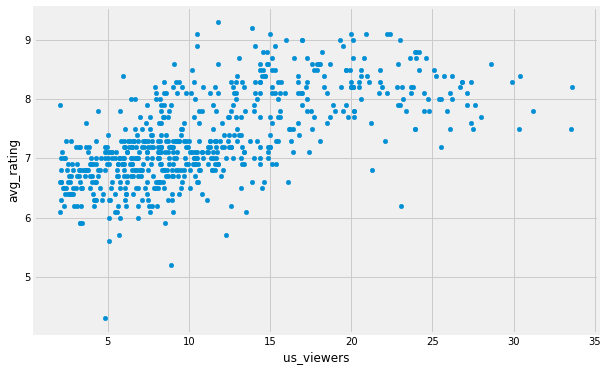

In [45]:
# scatter plot to see the avg ratings and viewers data
# are there outliers?
final_simpsons_df.plot.scatter(x='us_viewers', y='avg_rating', figsize=(9,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb230b8>]],
      dtype=object)

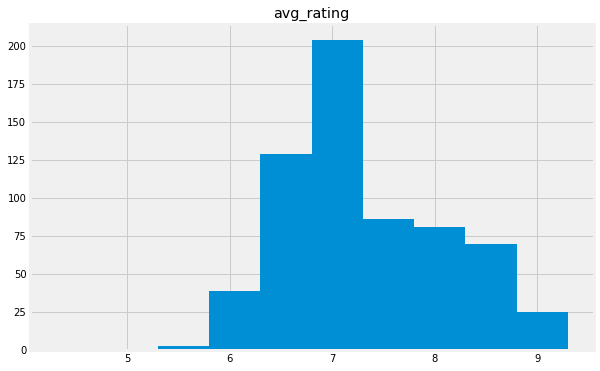

In [46]:
# potential outliers - ratings less than 5 and US viewers 5 million; viewers over 30 million
# so, the higher the rating the more viewers

# histogram of avg_rating
final_simpsons_df.hist(column='avg_rating', figsize=(9,6))

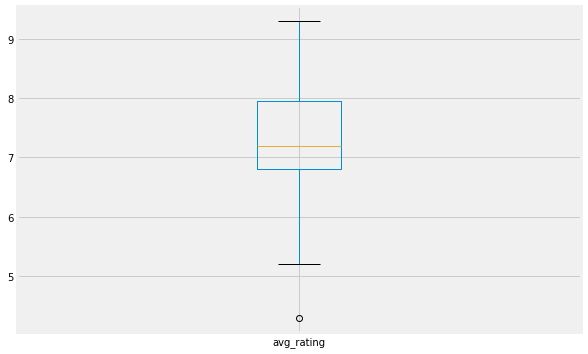

In [47]:
# most ratings in the 6.5 to 7.5 range

# boxplot of avg_rating
final_simpsons_df.boxplot(column='avg_rating', figsize=(9,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bdbcf60>]],
      dtype=object)

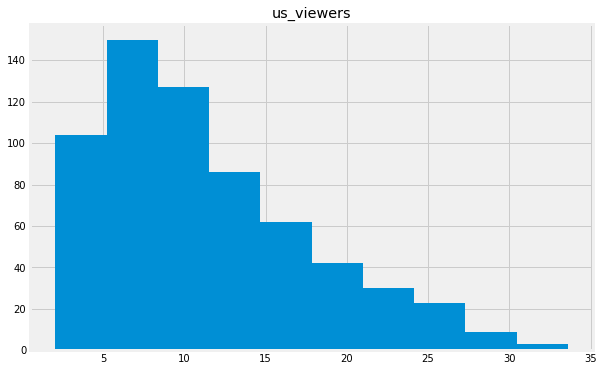

In [48]:
# histogram of us_viewers
final_simpsons_df.hist(column='us_viewers', figsize=(9,6))

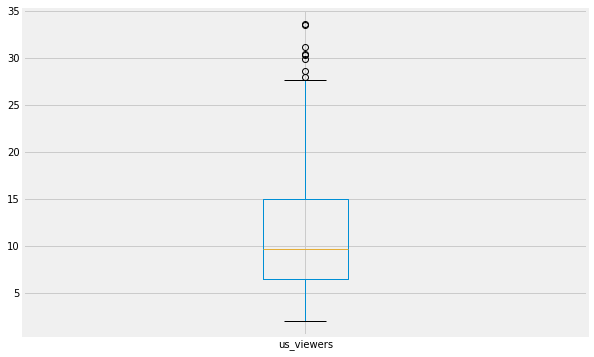

In [49]:
# healthy numbers in the 5 to 10 million range and right skewed

# boxplot of us_viewers
final_simpsons_df.boxplot(column='us_viewers', figsize=(9,6))

In [50]:
# some oultiers in the 25 million plus US Viewership

# Step 3 
## Granular details

In [51]:
# highest rated episodes
final_simpsons_df.sort_values(['avg_rating'],ascending=False)[0:10]

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
175,8,23,9.3,3130,176,Homer's Enemy,1997-05-04,11.8
154,8,2,9.2,3222,155,You Only Move Twice,1996-11-03,13.9
127,6,25,9.1,2243,128,Who Shot Mr. Burns? (Part One),1995-05-21,15.0
178,9,1,9.1,2522,179,The City of New York vs. Homer Simpson,1997-09-21,10.5
162,8,10,9.1,2364,163,The Springfield Files,1997-01-12,20.9
82,5,2,9.1,2791,83,Cape Feare,1993-10-07,20.0
108,6,6,9.1,2360,109,Treehouse of Horror V,1994-10-30,22.2
75,4,17,9.1,2435,76,Last Exit to Springfield,1993-03-11,22.4
111,6,9,9.0,2210,112,Homer Badman,1994-11-27,17.0
128,7,1,9.0,2017,129,Who Shot Mr. Burns? (Part Two),1995-09-17,16.0


In [52]:
# lowest rated episodes
final_simpsons_df.sort_values(['avg_rating'],ascending=True)[0:10]

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
507,23,22,4.3,1731,508,Lisa Goes Gaga,2012-05-20,4.82
188,9,11,5.2,1475,189,"All Singing, All Dancing",1998-01-04,8.90
497,23,12,5.6,756,498,Moe Goes from Rags to Riches,2012-01-29,5.12
456,21,16,5.7,906,457,The Greatest Story Ever D'ohed,2010-03-28,5.69
285,13,17,5.7,1002,286,Gump Roast,2002-04-21,12.30
563,26,12,5.9,644,564,The Musk Who Fell to Earth,2015-01-25,3.29
574,27,1,5.9,791,575,Every Man's Dream,2015-09-27,3.28
552,26,1,5.9,852,553,Clown in the Dumps,2014-09-28,8.53
548,25,19,5.9,616,549,What to Expect When Bart's Expecting,2014-04-27,3.45
428,20,9,6.0,943,429,Lisa the Drama Queen,2009-01-25,5.75


In [53]:
# average ratings by year
final_simpsons_df.groupby(['season'])['avg_rating'].mean()

season
1     7.823077
2     8.059091
3     8.195833
4     8.327273
5     8.381818
6     8.364000
7     8.368000
8     8.276000
9     7.868000
10    7.639130
11    7.295455
12    7.428571
13    7.131818
14    7.136364
15    7.086364
16    6.919048
17    6.936364
18    6.954545
19    6.910000
20    6.928571
21    6.826087
22    6.722727
23    6.759091
24    6.727273
25    6.813636
26    6.709091
27    6.827273
28    6.609091
29    6.761905
Name: avg_rating, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

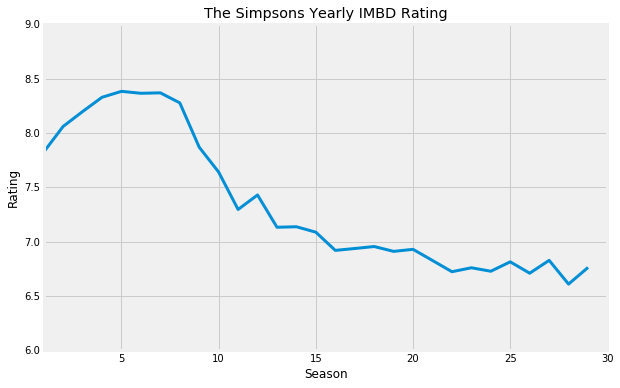

In [54]:
fig = plt.figure(figsize=(9,6))

plt.plot(final_simpsons_df.groupby(['season'])['avg_rating'].mean(), linewidth=3)

plt.ylabel('Rating')
plt.xlabel('Season')
plt.title('The Simpsons Yearly IMBD Rating')
plt.axis([1, 30, 6, 9])
#plt.grid(True)

plt.show

The show has held up fairly well. The average ratings of all episodes in season one was 7.82 (out of 10) and peaked in season 5 at 8.38. Last season (29) the ratings average was 6.76. Not a bad decline. Interestingly though, the highest rated individual episodes were between seasons 4 and 8, the peak of the highest ratings by year. The majority of the lowest rated seasons were in seasons 20-28 with one episode each in season 6, 9 and 13.

In [55]:
# Most Watched Episodes US Viewers
final_simpsons_df.sort_values(['us_viewers'],ascending=False)[0:10]

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
13,2,1,8.2,2226,14,"Bart Gets an ""F",1990-10-11,33.6
8,1,9,7.5,2122,9,Life on the Fast Lane,1990-03-18,33.5
10,1,11,7.8,2073,11,The Crepes of Wrath,1990-04-15,31.2
11,1,12,8.4,2261,12,Krusty Gets Busted,1990-04-29,30.4
9,1,10,7.5,2041,10,Homer's Night Out,1990-03-25,30.3
14,2,2,8.3,2136,15,Simpson and Delilah,1990-10-18,29.9
68,4,10,8.6,1824,69,Lisa's First Word,1992-12-03,28.6
7,1,8,7.7,2124,8,The Telltale Head,1990-02-25,28.0
6,1,7,7.9,2178,7,The Call of the Simpsons,1990-02-18,27.6
2,1,3,7.5,2304,3,Homer's Odyssey,1990-01-21,27.5


In [56]:
# Least Watched Epsiodes US Viewers
final_simpsons_df.sort_values(['us_viewers'],ascending=True)[0:10]

,season,episode,avg_rating,num_votes,episode_num_overall,title,original_air_date,us_viewers
631,29,14,6.1,278,632,Fears of a Clown,2018-04-01,2.06
629,29,12,6.6,342,630,Homer Is Where the Art Isn't,2018-03-18,2.07
638,29,21,7.9,363,639,Flanders' Ladder,2018-05-20,2.10
614,28,19,6.3,440,615,Caper Chase,2017-04-02,2.13
637,29,20,7.0,310,638,Throw Grampa from the Dane,2018-05-13,2.14
636,29,19,6.8,260,637,Left Behind,2018-05-06,2.15
632,29,15,6.6,289,633,No Good Read Goes Unpunished,2018-04-08,2.15
630,29,13,6.6,303,631,3 Scenes Plus a Tag from a Marriage,2018-03-25,2.15
617,28,22,6.6,378,618,Dogtown,2017-05-21,2.15
634,29,17,7.1,312,635,Lisa Gets the Blues,2018-04-22,2.19


In [57]:
# average u.s. viewers by year
final_simpsons_df.groupby(['season'])['us_viewers'].mean()

season
1     27.807692
2     24.404545
3     21.766667
4     22.395455
5     18.940909
6     15.596000
7     14.660000
8     14.600000
9     10.344000
10     8.737391
11     8.772273
12    15.485714
13    12.463636
14    14.378182
15    10.987273
16    10.373333
17     9.548636
18     9.149545
19     8.280500
20     7.070476
21     7.134783
22     7.092273
23     6.148182
24     5.411818
25     5.019091
26     4.804545
27     4.000455
28     4.146364
29     3.449048
Name: us_viewers, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

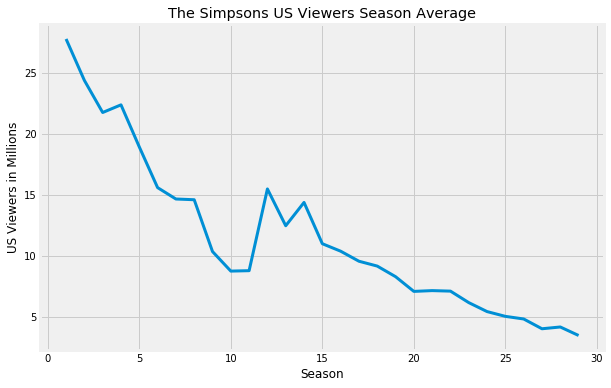

In [58]:
fig = plt.figure(figsize=(9,6))

plt.plot(final_simpsons_df.groupby(['season'])['us_viewers'].mean(), linewidth=3)

plt.ylabel('US Viewers in Millions')
plt.xlabel('Season')
plt.title('The Simpsons US Viewers Season Average')
#plt.axis([1, 30, 3, 28])
#plt.grid(True)

plt.show

U.S. Viewership has the most dramatic decline. The shows first season averaged 27 million viewers per episode, fell to an average of 8.7 million in season 11, rebounded to 15.4 million in season 12 and ended last year with 3.4 million per episode.  Not surprising, the most watched episodes were primarily in season 1 and 2 – there are a few from season 4. The least watched episodes are in seasons 27, 28 and 29. Despite the decline the numbers are still good enough to make the top 50 shows according to Nielsen (2017-2018 TV Series Ratings).

Trends in Viewership
-	The first ten seasons are the most consistent with viewership per episode. Relatively few peaks or valleys. Note - Season two started with 33 million viewers and ended with 17 million, a steady downward trend over the course of the season.  
-	In seasons 11-20 viewership is relatively flat meaning it was more consistent week to week. The lone exceptions are season 14 with two episodes over 20 million and season 16 with one episode over 20 million (double the average for that season)
-	In the last 10 seasons the most watched episodes were in January. As a comparison of seasons, the Spring episodes are more closely aligned to the average – more consistent week to week compared to the Fall where they are more erratic above or below the average. 

# Step 4 
## export file for further analysis in Tableau

In [59]:
final_simpsons_df.to_csv('simpsons_df.csv')